# 2017-09-15

Homework diode voltage temperature dependence.

Input our symbolic expression for $v_D$

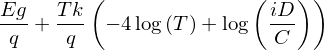

In [1]:
from sympy import *
init_printing()

T, iD, C, k, q, Eg = symbols('T iD C k q Eg')

vD = (k / q) * T * (ln(iD/C) - 4*ln(T)) + (Eg / q)
vD

Differentiate with respect to temperature:

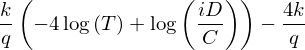

In [2]:
dvD = diff(vD, T)
dvD

Substitute specific values into this result and evaluate at $T = 300\,\mathrm{K}$:

In [3]:
# replace with numbers

vals ={k: 1.38e-23,  # J / K
       q: 1.602e-19, # C
       Eg: 1.12 * 1.602e-19,  # J

       #hand computed from IS=1e-15 at T=300K
       C: 8.19e-7,  # A / T^4

       #set a specific current
       iD: 1e-3,  # A
      }

dvD_T = dvD.subs(vals)
dvD_T.subs(T, 300).evalf()

So, *this* silicon diode's forward voltage changes by $-1.7 \,\mathrm{mV / ^\circ C}$ from room temperature.

Look at this forward voltage and slope over the industrial temperature range $-40$ to $125\,\mathrm{^\circ C}$: 

In [4]:
# get vD as a function of T only
vD_T = vD.subs(vals)

In [5]:
#setup numerical and plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('seaborn-bright')
mpl.rcParams['figure.figsize'] = (15.0, 8.0)
mpl.rcParams['font.size'] = 24
mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.markersize'] = 5

In [6]:
tempC = np.linspace(-40, 125, 1000)

#turn symbolic expression into a numpy function of one argument
# result is equivalent to:
#    def vD_func(T):
#        ...
vD_func = lambdify(T, vD_T, 'numpy')

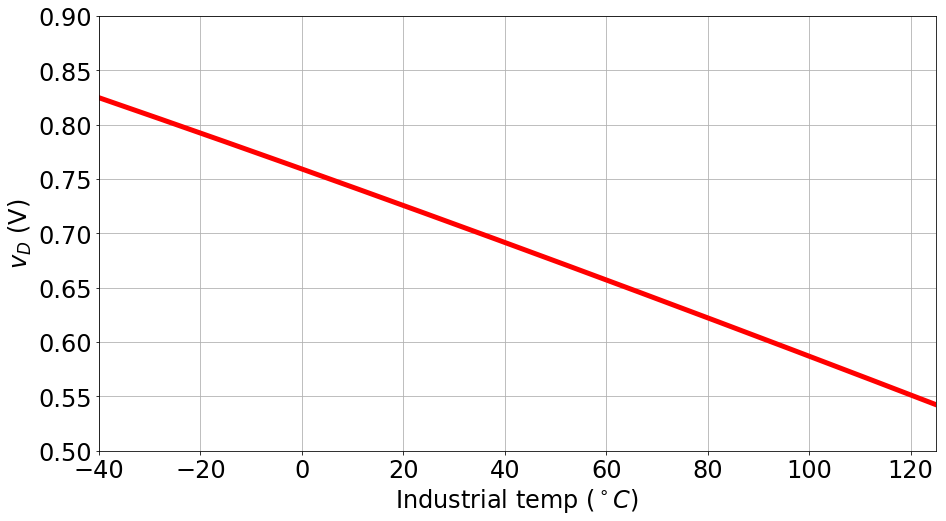

In [7]:
#plot!

fig, ax1 = plt.subplots()


ax1.plot(tempC, vD_func(tempC + 273.14), 'r')  # careful of K and degC!

ax1.set_xlim([min(tempC), max(tempC)])
ax1.set_xlabel('Industrial temp ($^\circ C$)')
ax1.set_ylabel('$v_D$ ($\mathrm{V}$)')

ax1.set_ylim([0.5, 0.9])


plt.grid(True)
plt.show()

With this plot range, there is no curvature!  Expand the range to see the curve:

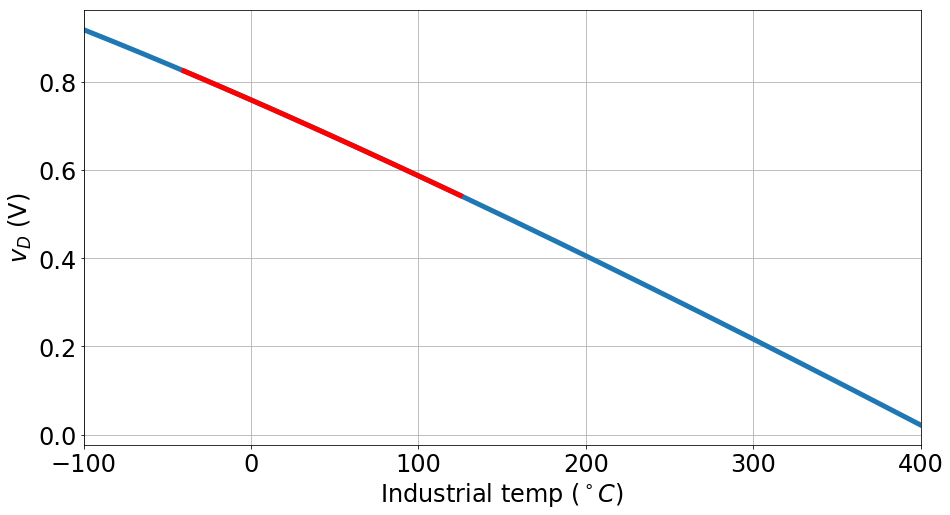

In [8]:
t = np.linspace(-100, 400, 1000)
plt.plot(t, vD_func(t + 273.14))  # careful of K and degC!
plt.plot(tempC, vD_func(tempC + 273.14), 'r')  # careful of K and degC!

plt.xlim([min(t), max(t)])
plt.xlabel('Industrial temp ($^\circ C$)')
plt.ylabel('$v_D$ ($\mathrm{V}$)')

plt.grid(True)
plt.show()

We can conclude with *high confidence* that it is a very good approximation to say that for a constant current, a diode's forward voltage drops linearly by $1.7 \,\mathrm{mV / ^\circ C}$.